# CE265 Spring 2025
## Assignment 4
Submitted by: Chun-hin (Anson) Sit, Jesus Hinojosa

### Parse the downloaded CSV file

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'Crashes.csv'
# Read with strip whitespace from column names
df = pd.read_csv(file_path, skipinitialspace=True)

# Clean column names by stripping extra whitespace
df.columns = df.columns.str.strip()

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of crashes: {len(df)}")

# Display the first few rows
df.head()


Dataset shape: (4147, 80)
Number of crashes: 4147


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,8167836,2019,2020-01-10,103,2019-06-29,1109,45,NaN,6,5,...,0,0,-,-,37.855839,-122.262413,ALAMEDA,BERKELEY,-122.262459,37.855797
1,8167848,2019,2020-03-04,103,2019-06-19,2220,155,NaN,3,5,...,0,0,-,-,37.859112,-122.289330,ALAMEDA,BERKELEY,-122.289001,37.859459
2,8167852,2019,2020-01-08,103,2019-06-23,1805,108,40,7,5,...,0,0,-,-,NaN,NaN,ALAMEDA,BERKELEY,-122.290268,37.863396
3,8167864,2019,2019-10-10,103,2019-06-23,2329,94,24,7,5,...,0,0,-,-,37.872150,-122.268410,ALAMEDA,BERKELEY,-122.268387,37.872200
4,8465866,2019,2019-06-21,109,2019-02-22,1433,8610,2,5,5,...,0,0,-,-,NaN,NaN,ALAMEDA,OAKLAND,-122.185089,37.797760


### Install required packages for geographic visualization

In [17]:
# Install required packages if not already installed
# Comment out if already installed

# Import additional libraries for geographic visualization
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import requests  # For better web requests with headers

In [18]:
# Download and load city boundaries for Alameda County (or all CA, if needed)
# If direct download fails (e.g., HTTP 403), try using a browser to download
# the file manually from https://www2.census.gov/geo/tiger/TIGER2022/PLACE/tl_2022_06_place.zip
# and place it in the working directory.
import geopandas as gpd
import os

city_shapefile_zip = "tl_2022_06_place.zip"

if not os.path.exists(city_shapefile_zip):
    print("Please manually download 'tl_2022_06_place.zip' from:")
    print("https://www2.census.gov/geo/tiger/TIGER2022/PLACE/tl_2022_06_place.zip")
    print("and place it in your working directory.")
else:
    # Read the shapefile
    cities_gdf = gpd.read_file(f"zip://{city_shapefile_zip}")

    # Filter for Berkeley and Oakland
    berkeley_oakland = cities_gdf[cities_gdf['NAME'].isin(['Berkeley', 'Oakland'])].copy()

    # Ensure CRS matches crash data (EPSG:4326)
    if berkeley_oakland.crs != "EPSG:4326":
        berkeley_oakland = berkeley_oakland.to_crs("EPSG:4326")

    # Assign colors for each city
    city_colors = {'Berkeley': 'blue', 'Oakland': 'green'}

    # Show basic info
    print(berkeley_oakland[['NAME', 'geometry']])

         NAME                                           geometry
315   Oakland  POLYGON ((-122.35588 37.83573, -122.35073 37.8...
345  Berkeley  POLYGON ((-122.36778 37.86673, -122.35671 37.8...


### Verify the data integrity of PCF_VIOL_CATEGORY

In [19]:
# Let's examine the PCF_VIOL_CATEGORY column to understand its data type and values
print("PCF_VIOL_CATEGORY data type:", df['PCF_VIOL_CATEGORY'].dtype)
print("\nUnique values in PCF_VIOL_CATEGORY:")
print(df['PCF_VIOL_CATEGORY'].value_counts())

# Ensure values are strings and strip any whitespace
df['PCF_VIOL_CATEGORY'] = df['PCF_VIOL_CATEGORY'].astype(str).str.strip()

# Now filter for values '01' or '23'
df_filtered = df[df['PCF_VIOL_CATEGORY'].isin(['01', '1', '23'])]

# Display basic information about filtered dataset
print(f"\nFiltered dataset shape: {df_filtered.shape}")
print(f"Number of crashes with PCF_VIOL_CATEGORY '01' or '23': {len(df_filtered)}")
print("\nDistribution of PCF_VIOL_CATEGORY in filtered data:")
print(df_filtered['PCF_VIOL_CATEGORY'].value_counts())

# Display the first few rows of filtered dataset
df_filtered.head()

PCF_VIOL_CATEGORY data type: object

Unique values in PCF_VIOL_CATEGORY:
PCF_VIOL_CATEGORY
03                   899
08                   736
09                   503
12                   474
10                   352
01                   320
07                   181
11                   158
00                   111
05                    96
18                    88
17                    61
21                    47
06                    38
-                     33
22                    26
04                    17
13                     4
14                     3
Name: count, dtype: int64

Filtered dataset shape: (320, 80)
Number of crashes with PCF_VIOL_CATEGORY '01' or '23': 320

Distribution of PCF_VIOL_CATEGORY in filtered data:
PCF_VIOL_CATEGORY
01    320
Name: count, dtype: int64


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
7,8799457,2019,2019-02-22,109,2019-01-05,1345,9670,2,6,5,...,0,0,-,-,NaN,NaN,ALAMEDA,OAKLAND,-122.217773,37.779987
11,8799834,2021,2022-09-26,109,2021-09-09,2039,8483,2,4,5,...,0,0,-,-,NaN,NaN,ALAMEDA,OAKLAND,-122.219925,37.774799
39,8822852,2019,2019-03-27,109,2019-02-23,59,9681,2,6,5,...,0,0,-,-,NaN,NaN,ALAMEDA,OAKLAND,-122.222702,37.776131
61,8833045,2019,2019-04-11,103,2019-02-18,214,27,NaN,1,5,...,0,0,-,-,37.862999,-122.260300,ALAMEDA,BERKELEY,-122.260399,37.863297
103,8841450,2019,2019-04-17,103,2019-01-15,1722,1,NaN,2,5,...,0,0,-,-,37.870411,-122.281937,ALAMEDA,BERKELEY,-122.282043,37.870461


In [20]:
# Basic statistics on the filtered dataset
print("Counties in the filtered dataset:")
print(df_filtered['COUNTY'].value_counts())

print("\nCities in the filtered dataset:")
print(df_filtered['CITY'].value_counts())

# Check for missing POINT_X/POINT_Y coordinates in filtered data
missing_coords = df_filtered[df_filtered['POINT_X'].isna() | df_filtered['POINT_Y'].isna()]
print(f"\nRecords with missing POINT_X/POINT_Y coordinates: {len(missing_coords)}")

# Keep only records with valid POINT_X and POINT_Y coordinates
df_valid = df_filtered.dropna(subset=['POINT_X', 'POINT_Y'])
print(f"Final dataset size with valid coordinates: {len(df_valid)}")

# Distribution of PCF_VIOL_CATEGORY values in the filtered dataset
print("PCF_VIOL_CATEGORY distribution:")
print(df_valid['PCF_VIOL_CATEGORY'].value_counts())

# Check collision severity in filtered dataset
print("\nCollision severity distribution:")
print(df_valid['COLLISION_SEVERITY'].value_counts())

# Check alcohol involvement in filtered dataset
print("\nAlcohol involvement:")
print(df_valid['ALCOHOL_INVOLVED'].value_counts(dropna=False))


Counties in the filtered dataset:
COUNTY
ALAMEDA    320
Name: count, dtype: int64

Cities in the filtered dataset:
CITY
OAKLAND     252
BERKELEY     68
Name: count, dtype: int64

Records with missing POINT_X/POINT_Y coordinates: 4
Final dataset size with valid coordinates: 316
PCF_VIOL_CATEGORY distribution:
PCF_VIOL_CATEGORY
01    316
Name: count, dtype: int64

Collision severity distribution:
COLLISION_SEVERITY
3    177
2    105
1     34
Name: count, dtype: int64

Alcohol involvement:
ALCOHOL_INVOLVED
Y                   276
NaN                  40
Name: count, dtype: int64


### Plotting the graphs

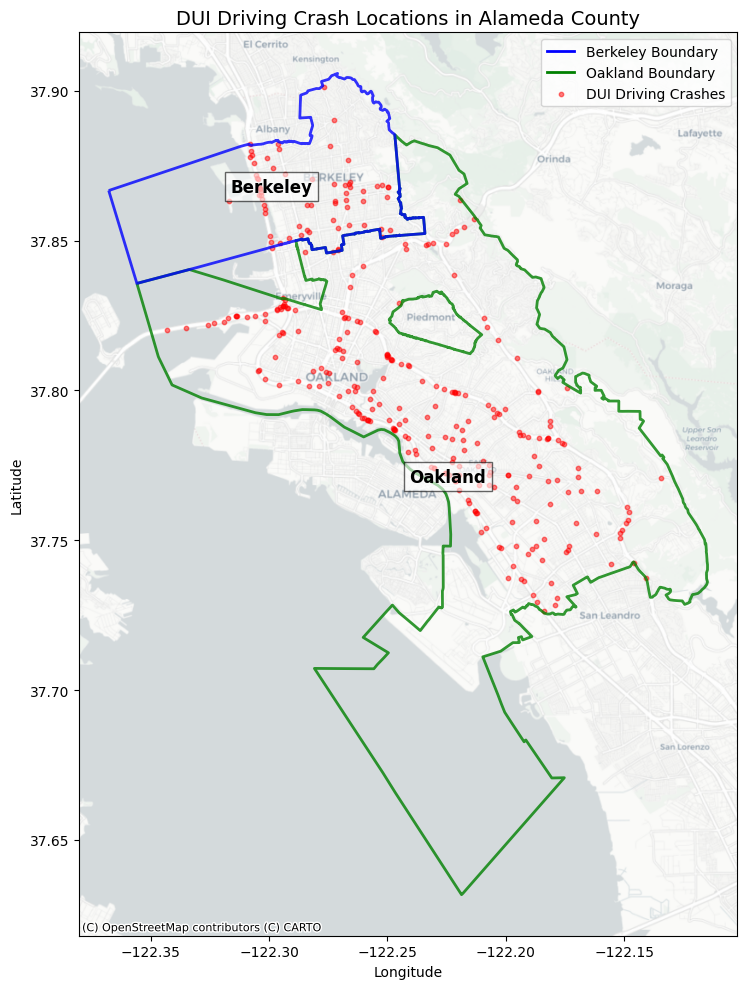

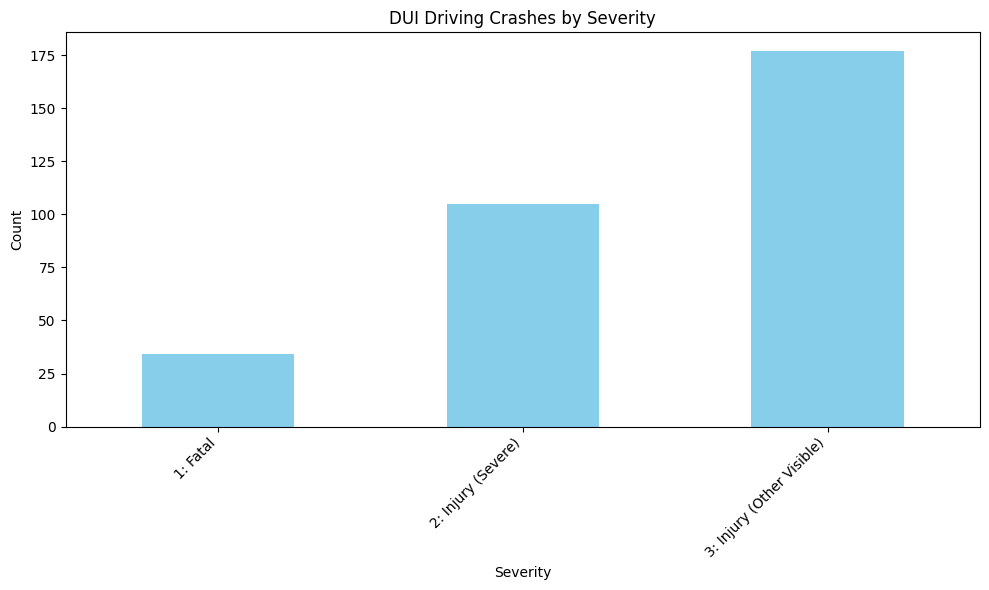

In [21]:
road_edges = None  # Add this before any plotting code that references road_edges

# Convert DataFrame to GeoDataFrame for better geographic visualization
try:
    # Create geometry column from POINT_X and POINT_Y
    geometry = [Point(xy) for xy in zip(df_valid['POINT_X'], df_valid['POINT_Y'])]
    gdf_crashes = gpd.GeoDataFrame(df_valid, geometry=geometry, crs="EPSG:4326")
    use_geopandas = True
except Exception as e:
    print(f"Error creating GeoDataFrame: {e}")
    print("Will use matplotlib for visualization instead")
    use_geopandas = False

# Set up figure and visualization
plt.figure(figsize=(12, 10))

if use_geopandas and berkeley_oakland is not None:
    # Plot with city boundaries using GeoPandas
    ax = plt.subplot(111)

    # Plot city boundaries (fix: use GeoSeries.plot, not geometry.boundary.plot)
    berkeley_oakland.boundary.plot(ax=ax, color=[city_colors.get(name, 'gray') for name in berkeley_oakland['NAME']], linewidth=2, alpha=0.8, label=None)

    # Add legend manually for city boundaries
    for name, color in city_colors.items():
        ax.plot([], [], color=color, linewidth=2, label=f"{name} Boundary")

    # Plot road network if available
    if road_edges is not None:
        road_edges.plot(ax=ax, color='gray', linewidth=0.5, alpha=0.5, label='Roads')

    # Plot crash locations
    gdf_crashes.plot(ax=ax, color='red', alpha=0.5, markersize=10, label='DUI Driving Crashes')

    # Add basemap (background map)
    try:
        ctx.add_basemap(ax, crs=gdf_crashes.crs.to_string(), source=ctx.providers.CartoDB.Positron)
    except Exception as e:
        print(f"Could not add basemap: {e}")

    # Add city labels
    for idx, city in berkeley_oakland.iterrows():
        centroid = city['geometry'].centroid
        plt.annotate(city['NAME'], (centroid.x, centroid.y), fontsize=12, ha='center', 
                     fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.6))

    # Add legend and labels
    plt.legend(loc='upper right')
    plt.title('DUI Driving Crash Locations in Alameda County', fontsize=14)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

else:
    # Fallback to original visualization method
    plt.scatter(df_valid['POINT_X'], df_valid['POINT_Y'], c='red', alpha=0.5, s=10)
    plt.title('DUI Driving Crash Locations in Alameda County')
    plt.xlabel('Longitude (POINT_X)')
    plt.ylabel('Latitude (POINT_Y)')
    plt.grid(True, alpha=0.3)

    # Add city labels for reference
    cities = df_valid.groupby('CITY')[['POINT_X', 'POINT_Y']].mean()
    for city, (lon, lat) in cities.iterrows():
        plt.annotate(city, (lon, lat), fontsize=9, ha='center')

plt.tight_layout()
plt.show()

# Count crashes by severity for filtered dataset
severity_counts = df_valid['COLLISION_SEVERITY'].value_counts().sort_index()
severity_labels = {
    1: 'Fatal',
    2: 'Injury (Severe)',
    3: 'Injury (Other Visible)',
    4: 'Injury (Complaint of Pain)',
    0: 'Property Damage Only'
}

# Map numeric values to descriptive labels
severity_counts.index = severity_counts.index.map(lambda x: f"{x}: {severity_labels.get(x, 'Unknown')}")

plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('DUI Driving Crashes by Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Number of DUI driving crashes with valid POINT_X and POINT_Y: 316


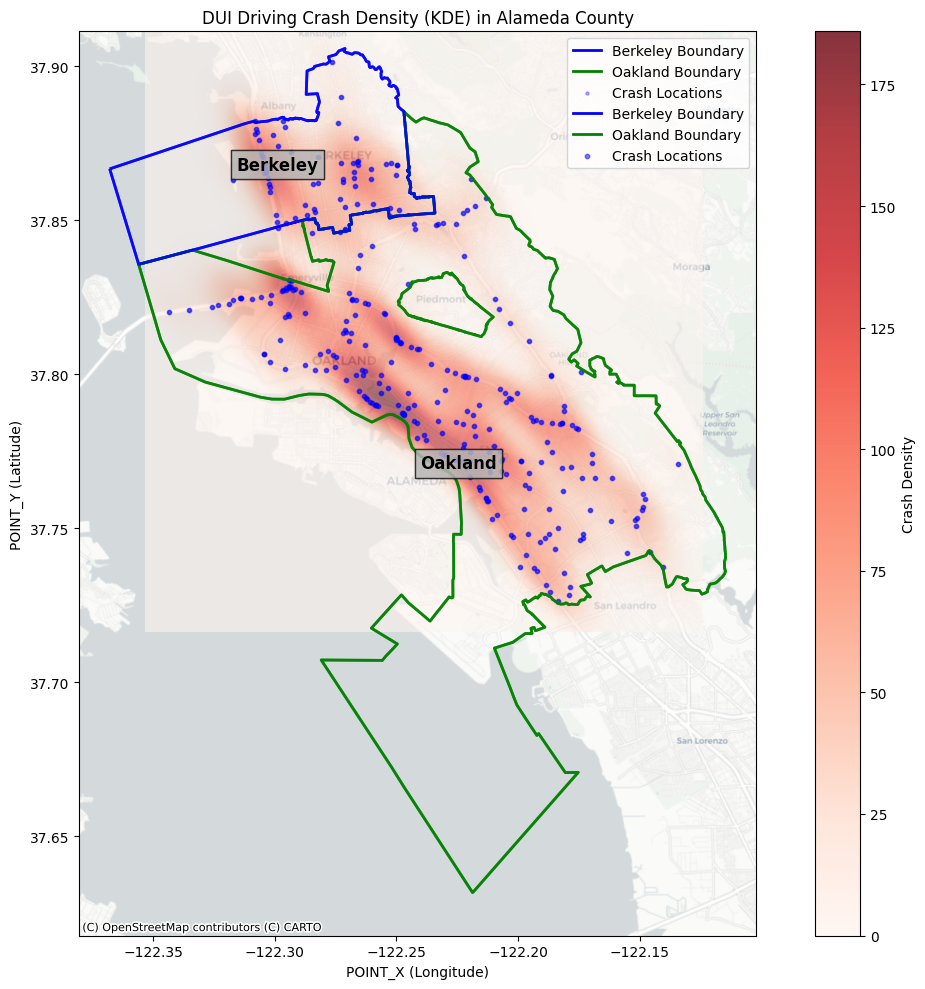

In [22]:
# Kernel Density Estimation (KDE) for DUI driving crash concentrations using POINT_X and POINT_Y
from scipy.stats import gaussian_kde

# Prepare data - using POINT_X and POINT_Y from filtered dataset
print(f"Number of DUI driving crashes with valid POINT_X and POINT_Y: {len(df_valid)}")

x = df_valid['POINT_X'].values
y = df_valid['POINT_Y'].values

# Perform KDE
xy = np.vstack([x, y])
kde = gaussian_kde(xy, bw_method=0.2)

# Create grid for evaluation
x_min, x_max = x.min() - 0.01, x.max() + 0.01
y_min, y_max = y.min() - 0.01, y.max() + 0.01
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
density = kde(positions).reshape(x_grid.shape)

# Setup figure for KDE heatmap with geographic context
plt.figure(figsize=(12, 10))

if use_geopandas and berkeley_oakland is not None:
    # Create axis
    ax = plt.subplot(111)

    # Plot heatmap
    plt.imshow(density, origin='lower', aspect='auto',
               extent=[x_min, x_max, y_min, y_max], cmap='hot', alpha=0.6)

    # Plot city boundaries (fix: use GeoSeries.plot, not geometry.boundary.plot)
    berkeley_oakland.boundary.plot(ax=ax, color=[city_colors.get(name, 'gray') for name in berkeley_oakland['NAME']], linewidth=2, alpha=0.8, label=None)

    # Add legend manually for city boundaries
    for name, color in city_colors.items():
        ax.plot([], [], color=color, linewidth=2, label=f"{name} Boundary")

    # Plot road network if available
    if road_edges is not None:
        road_edges.plot(ax=ax, color='white', linewidth=0.5, alpha=0.7, label='Roads')

    # Plot crash locations
    plt.scatter(x, y, c='blue', s=5, alpha=0.3, label='Crash Locations')

    # Add city labels
    for idx, city in berkeley_oakland.iterrows():
        centroid = city['geometry'].centroid
        plt.annotate(city['NAME'], (centroid.x, centroid.y), fontsize=12, ha='center', 
                     fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.6))

    # Add basemap (background map) as in the main crash plot cell
    try:
        ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
    except Exception as e:
        print(f"Could not add basemap: {e}")

    # Plot KDE heatmap
    im = ax.imshow(
        density,
        origin='lower',
        extent=[x_min, x_max, y_min, y_max],
        cmap='Reds',
        alpha=0.8,  # transparency so basemap and roads are visible
        aspect='auto'
    )
    plt.colorbar(im, ax=ax, label='Crash Density')

    # Overlay city boundaries if available
    if 'berkeley_oakland' in globals() and berkeley_oakland is not None:
        berkeley_oakland.boundary.plot(ax=ax, color=[city_colors.get(name, 'gray') for name in berkeley_oakland['NAME']], linewidth=2, alpha=0.8, label=None)
        for name, color in city_colors.items():
            ax.plot([], [], color=color, linewidth=2, label=f"{name} Boundary")

    # Overlay road network if available
    if 'road_edges' in globals() and road_edges is not None:
        road_edges.plot(ax=ax, color='gray', linewidth=0.5, alpha=0.5, label='Roads')

    # Prepare crash_points for plotting (use df_valid, which is always available in this context)
    crash_points = df_valid[['POINT_X', 'POINT_Y']].values

    # Overlay crash locations
    ax.scatter(crash_points[:, 0], crash_points[:, 1], c='blue', s=10, alpha=0.5, label='Crash Locations')

    # Add city labels if available
    if 'berkeley_oakland' in globals() and berkeley_oakland is not None:
        for idx, city in berkeley_oakland.iterrows():
            centroid = city['geometry'].centroid
            plt.annotate(city['NAME'], (centroid.x, centroid.y), fontsize=12, ha='center', fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.6))

    # Add basemap (background map) as in the main crash plot cell
    try:
        # Use alpha for the basemap to make it more transparent (e.g., 0.3)
        ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron, alpha=0.3)
    except Exception as e:
        print(f"Could not add basemap: {e}")

else:
    # Fallback to original visualization method
    plt.imshow(density, origin='lower', aspect='auto',
               extent=[x_min, x_max, y_min, y_max], cmap='hot', alpha=0.6)
    plt.scatter(x, y, c='blue', s=5, alpha=0.3, label='Crash Locations')

plt.title('DUI Driving Crash Density (KDE) in Alameda County')
plt.xlabel('POINT_X (Longitude)')
plt.ylabel('POINT_Y (Latitude)')
# plt.colorbar(label='Density')
plt.legend()
plt.tight_layout()
plt.show()